In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2021')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\Capstone 2021'

In [3]:
data = pd.read_csv('application_data.csv')

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
data.shape

(307511, 122)

In [6]:
data.isnull().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [7]:
drop_cols=data.isnull().sum()
drop_cols=drop_cols[drop_cols.values>(0.25*len(data))] # checking for columns that are more than 25% null values
len(drop_cols)

50

In [8]:
drop_cols = list(drop_cols[drop_cols.values>0.25].index) #Returning the first instance of the value
data.drop(labels=drop_cols,axis=1,inplace=True)

In [9]:
data.shape

(307511, 72)

In [10]:
data.isnull().sum().tail(50)

FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
F

In [11]:
data.AMT_ANNUITY.median()

24903.0

In [12]:
data['AMT_ANNUITY']=data.AMT_ANNUITY.fillna(data.AMT_ANNUITY.median()) #Mean is biased by the values at the far end of the distibution

data['AMT_ANNUITY'].describe() #Imputing missing values (using median)

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [13]:
data.FLAG_DOCUMENT_2.unique() #Dropping columns starting with 'FLAG_DOC*' not relevant

array([0, 1], dtype=int64)

In [14]:
# getting all columns starting with 'FLAG_DOC*'
flag_cols=[x for x in data if x.startswith('FLAG_DOC')] 
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
data.drop(labels=flag_cols,axis=1,inplace=True)

In [16]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [17]:
data.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

data.AMT_GOODS_PRICE.median()

450000.0

In [18]:
# Imputing missing values with median for AMT_GOODS_PRICE
data['AMT_GOODS_PRICE']=data.AMT_GOODS_PRICE.fillna(data.AMT_GOODS_PRICE.median())

data.AMT_GOODS_PRICE.isnull().sum()

0

In [19]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
R

In [20]:
#dropping social circle columns, no clear description
data.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [21]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
R

In [22]:
data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [23]:
data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [24]:
data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [25]:
data.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [26]:
data['AMT_REQ_CREDIT_BUREAU_HOUR']=data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(data.AMT_REQ_CREDIT_BUREAU_HOUR.median)
data['AMT_REQ_CREDIT_BUREAU_DAY']=data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(data.AMT_REQ_CREDIT_BUREAU_DAY.median)
data['AMT_REQ_CREDIT_BUREAU_WEEK']=data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(data.AMT_REQ_CREDIT_BUREAU_WEEK.median)
data['AMT_REQ_CREDIT_BUREAU_MON']=data.AMT_REQ_CREDIT_BUREAU_MON.fillna(data.AMT_REQ_CREDIT_BUREAU_MON.median)
data['AMT_REQ_CREDIT_BUREAU_YEAR']=data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(data.AMT_REQ_CREDIT_BUREAU_YEAR.median)
data['AMT_REQ_CREDIT_BUREAU_QRT']=data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(data.AMT_REQ_CREDIT_BUREAU_QRT.median)

In [27]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
R

In [28]:
# Checking counts of CODE_GENDER
data.CODE_GENDER.value_counts() 
# We have 4 values for XNA which means not available. We can replace these values with mode for code_gender column.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
data.CODE_GENDER=data.CODE_GENDER.replace('XNA','F') #Replacing 'XNA' values for CODE_GENDER with mode i.e 'F'

In [30]:
data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
#Checking Columns starting with 'DAYS_' for any incorrect datatype or outliers or errors
print(data.DAYS_EMPLOYED.unique())
print(data.DAYS_BIRTH.unique())
print(data.DAYS_REGISTRATION.unique())

[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [32]:
#We have negative values in these columns. Fetching columns starting with 'DAYS' into a new dataframe.
days_cols=[x for x in data if x.startswith('DAYS')] 
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [33]:
#Converting the values in columns starting with 'DAYS' to absolute
data[days_cols]= abs(data[days_cols])

In [34]:
# Checking whether the values are converted to absolute for few columns starting with 'DAYS' 
print(data.DAYS_EMPLOYED.unique())
print(data.DAYS_BIRTH.unique())
print(data.DAYS_REGISTRATION.unique())

[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]


In [35]:
# Days_birth column has the age of the client in days and the datatype is float
data.DAYS_BIRTH.describe() 

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [36]:
# Converting the age to years and the datatype to int
data.DAYS_BIRTH = ((data.DAYS_BIRTH)/365).astype('int')

In [37]:
data.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [38]:
#Let's bin the birth data to make it easier to use.
data['DAYS_BIRTH_BINS']=pd.cut(data.DAYS_BIRTH, bins=[18,40,60,100], labels=['Young','Middle_Age','Senior'])

In [39]:
data['DAYS_BIRTH_BINS'].value_counts()

Middle_Age    142220
Young         135923
Senior         29368
Name: DAYS_BIRTH_BINS, dtype: int64

In [40]:
#Let's repeat the binning process...
data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
#The total income value will be split b/w 5 categories
data['INCOME_VAL'] = pd.cut(data.AMT_INCOME_TOTAL, bins=[0,50000,150000,300000,500000,1000000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [42]:
data['INCOME_VAL'].value_counts()

Low          150772
Medium       129483
High          20037
Very Low       4517
Very High      2452
Name: INCOME_VAL, dtype: int64

In [43]:
#Target contains either 1 or 0 per ID. 1 means that the borrower has had a late payment. 0 means otherwise. 
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [44]:
#Finding the imbalance ratio of TARGET
data_target0 = data.loc[data.TARGET == 0]
data_target1 = data.loc[data.TARGET == 1]

In [45]:
print(data_target0.shape)
print(data_target1.shape)

(282686, 49)
(24825, 49)


In [46]:
#Imbalance ratio = 11.39
round(len(data_target0)/len(data_target1),2)

11.39

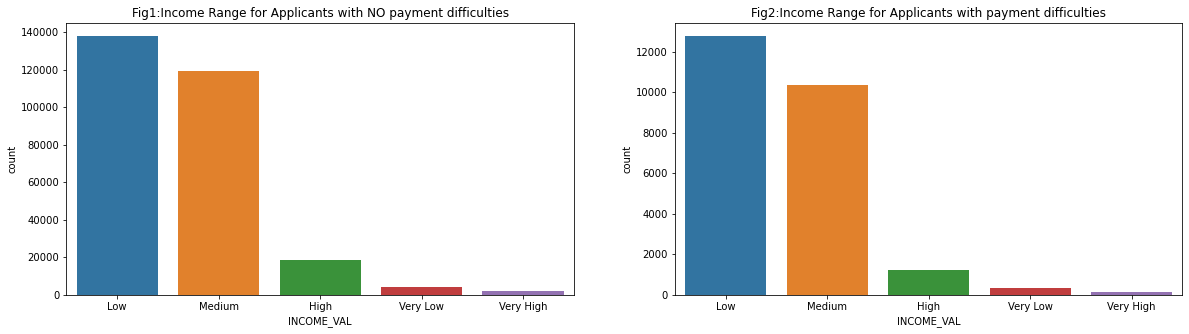

In [47]:
#The trend between both bar graphs is that those whose incomes are very low, high, or very high make up a small percentage of people borrowing money.
#The low income range has the highest count in both applicants with NO payment difficulties and with payment difficulties. 
#Medium range applicants are close behind in both cases. 
fig, ax =plt.subplots(1,2,figsize=[20,5])

sns.countplot(data=data_target0,x = 'INCOME_VAL',order = data_target0['INCOME_VAL'].value_counts().index,ax=ax[0])
sns.countplot(data=data_target1,x = 'INCOME_VAL',order = data_target1['INCOME_VAL'].value_counts().index,ax=ax[1])
ax[0].set_title('Fig1:Income Range for Applicants with NO payment difficulties')
ax[1].set_title('Fig2:Income Range for Applicants with payment difficulties')
plt.show()

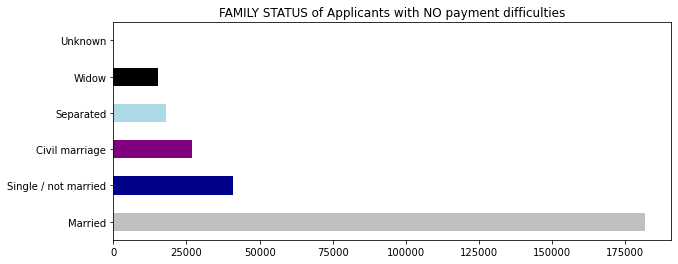

In [48]:
#Family status of potential borrowers with NO payment issues
plt.figure(figsize=[10,4])
data_target0.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with NO payment difficulties')
plt.show()

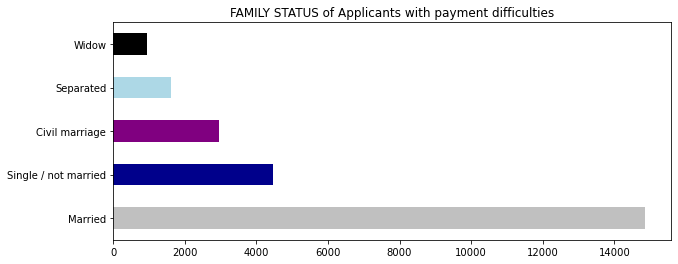

In [49]:
#Family status of potential borrowers with payment issues
plt.figure(figsize=[10,4])
data_target1.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['silver', 'darkblue', 'purple', 'lightblue', 'black'])
plt.title('FAMILY STATUS of Applicants with payment difficulties')
plt.show()

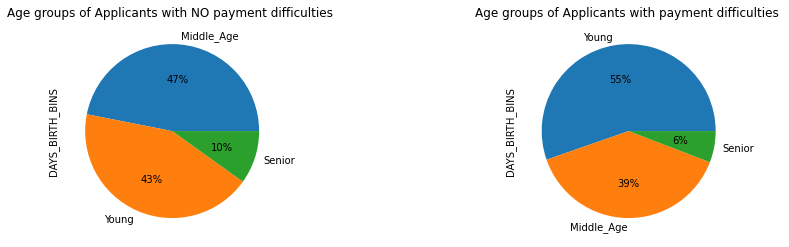

In [50]:
#An overwhelming majority of applicants are middle to lower class married couples.
#What do the age distributions of all applicants look like?
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
data_target0.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
data_target1.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

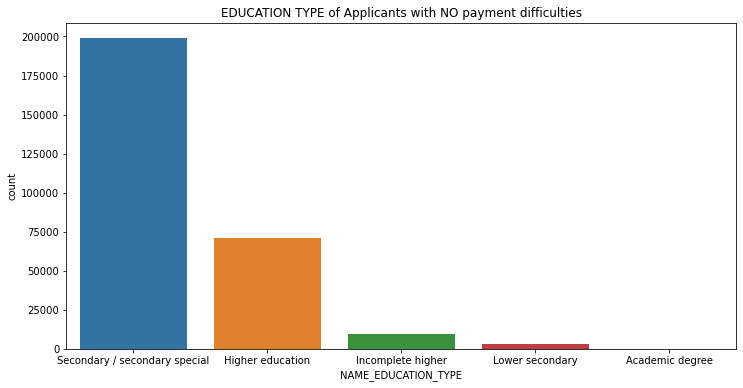

In [58]:
#Here are the education types of applicants with NO payment issues
plt.figure(figsize=[12,6])
sns.countplot(data=data_target0,x = 'NAME_EDUCATION_TYPE',order = data_target0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with NO payment difficulties')
plt.show()

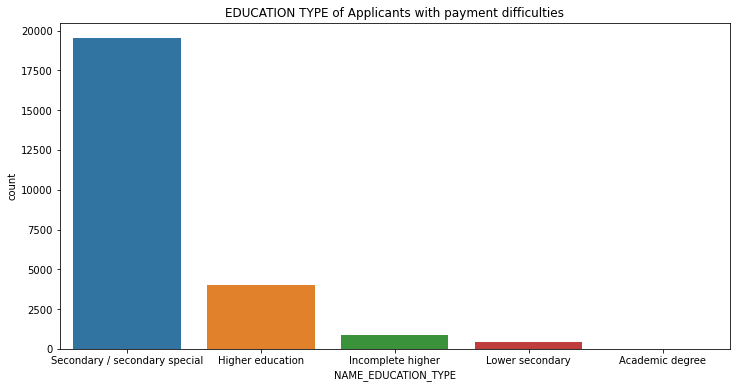

In [60]:
#Applicants' education type with payment issues
plt.figure(figsize=[12,6])
sns.countplot(data=data_target1,x = 'NAME_EDUCATION_TYPE',order = data_target1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with payment difficulties')
plt.show()

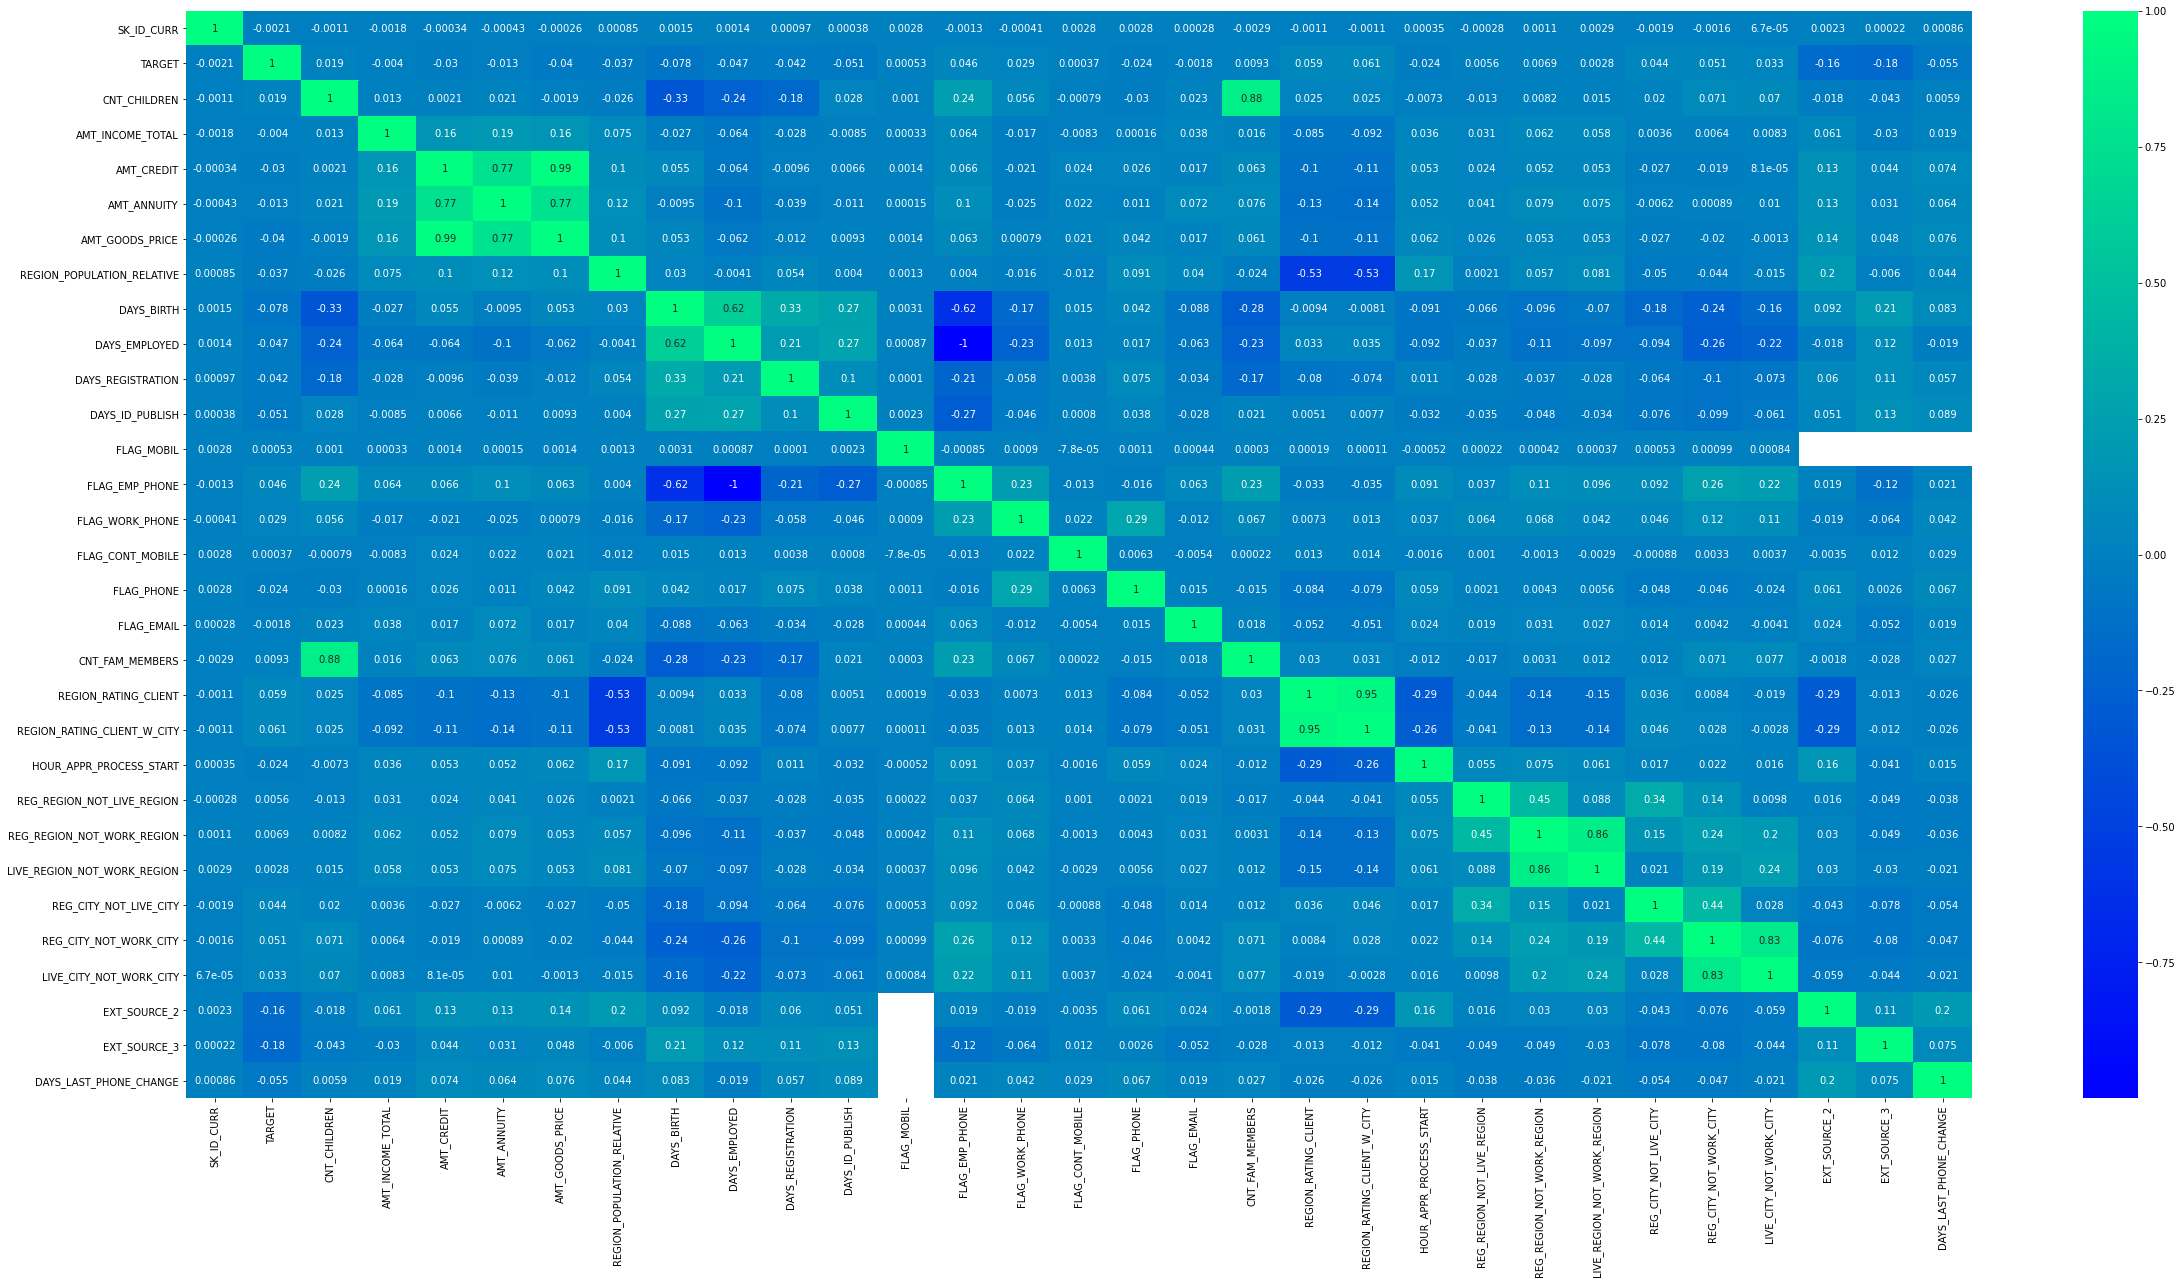

In [56]:
#Here is the correlation among variables
#Lots of interesting relationships among variables!
plt.figure(figsize = (40,20))
sns.heatmap(data.corr(), annot=True, cmap='winter')

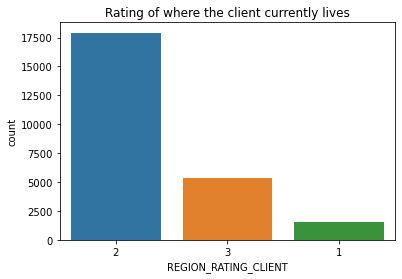

In [67]:
#Lets look at the region ratings.
#Based on what we've seen so far, it can be inferred that regions rated as 1 are affluent. They have no reason to seek out loans.  
sns.countplot(data=data_target1,x = 'REGION_RATING_CLIENT',order = data_target1['REGION_RATING_CLIENT'].value_counts().index)
plt.title('Rating of where the client currently lives')
plt.show()

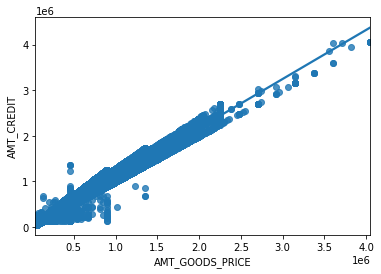

In [69]:
#The amount of credit recieved and the price of the desired good match each other at an almost 1:1 ratio
sns.regplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=data)

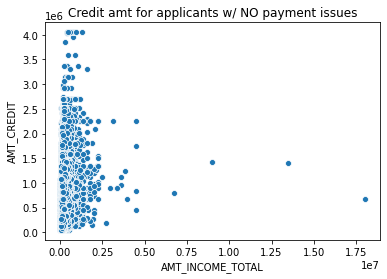

In [89]:
#High income does not equate to higher credit amounts. As stated earlier, most potential borrowers live a middle or lower class life.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=data_target0)
plt.title('Credit amt for applicants w/ NO payment issues')
plt.show()

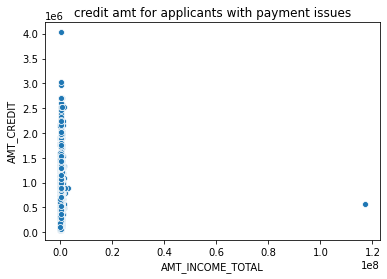

In [88]:
#In the case of those with payment issues, most are in lower class earners. There is one high income outlier that had payment issues.

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=data_target1)
plt.title('credit amt for applicants with payment issues')
plt.show()

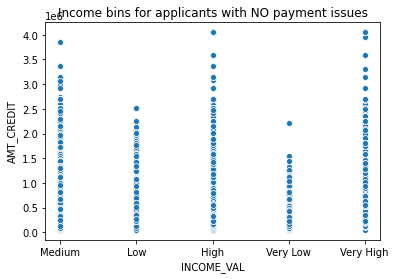

In [91]:
sns.scatterplot(x='INCOME_VAL', y='AMT_CREDIT', data=data_target0)
plt.title('Income bins for applicants with NO payment issues')
plt.show()

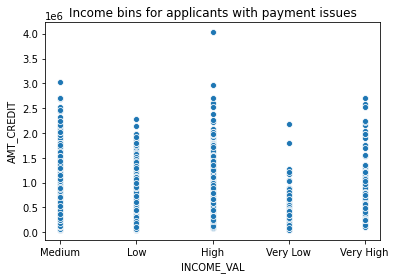

In [96]:
sns.scatterplot(x='INCOME_VAL', y='AMT_CREDIT', data=data_target1)
plt.title('Income bins for applicants with payment issues')
plt.show()